# Importing Tools  

In [82]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

# Importing,visualizing and preparing data

In [9]:
# import training datasets
df_train = pd.read_csv('./Desktop/sklearn/materials/train.csv')
df_train.head()

,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,formation_energy_ev_natom,bandgap_energy_ev
0,1,33,80.0,0.6250,0.3750,0.000,9.9523,8.5513,9.1775,90.0026,90.0023,90.0017,0.0680,3.4387
1,2,194,80.0,0.6250,0.3750,0.000,6.1840,6.1838,23.6287,90.0186,89.9980,120.0025,0.2490,2.9210
2,3,227,40.0,0.8125,0.1875,0.000,9.7510,5.6595,13.9630,90.9688,91.1228,30.5185,0.1821,2.7438
3,4,167,30.0,0.7500,0.0000,0.250,5.0036,5.0034,13.5318,89.9888,90.0119,120.0017,0.2172,3.3492
4,5,194,80.0,0.0000,0.6250,0.375,6.6614,6.6612,24.5813,89.9960,90.0006,119.9893,0.0505,1.3793


In [10]:
# length of datasets
len(df_train)

2400

In [36]:
# Check the NaN fields 
df_train.isna().sum()

id                            0
spacegroup                    0
number_of_total_atoms         0
percent_atom_al               0
percent_atom_ga               0
percent_atom_in               0
lattice_vector_1_ang          0
lattice_vector_2_ang          0
lattice_vector_3_ang          0
lattice_angle_alpha_degree    0
lattice_angle_beta_degree     0
lattice_angle_gamma_degree    0
formation_energy_ev_natom     0
bandgap_energy_ev             0
dtype: int64

In [116]:
# Types of data in each column
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          2400 non-null   int64  
 1   spacegroup                  2400 non-null   int64  
 2   number_of_total_atoms       2400 non-null   float64
 3   percent_atom_al             2400 non-null   float64
 4   percent_atom_ga             2400 non-null   float64
 5   percent_atom_in             2400 non-null   float64
 6   lattice_vector_1_ang        2400 non-null   float64
 7   lattice_vector_2_ang        2400 non-null   float64
 8   lattice_vector_3_ang        2400 non-null   float64
 9   lattice_angle_alpha_degree  2400 non-null   float64
 10  lattice_angle_beta_degree   2400 non-null   float64
 11  lattice_angle_gamma_degree  2400 non-null   float64
 12  formation_energy_ev_natom   2400 non-null   float64
 13  bandgap_energy_ev           2400 

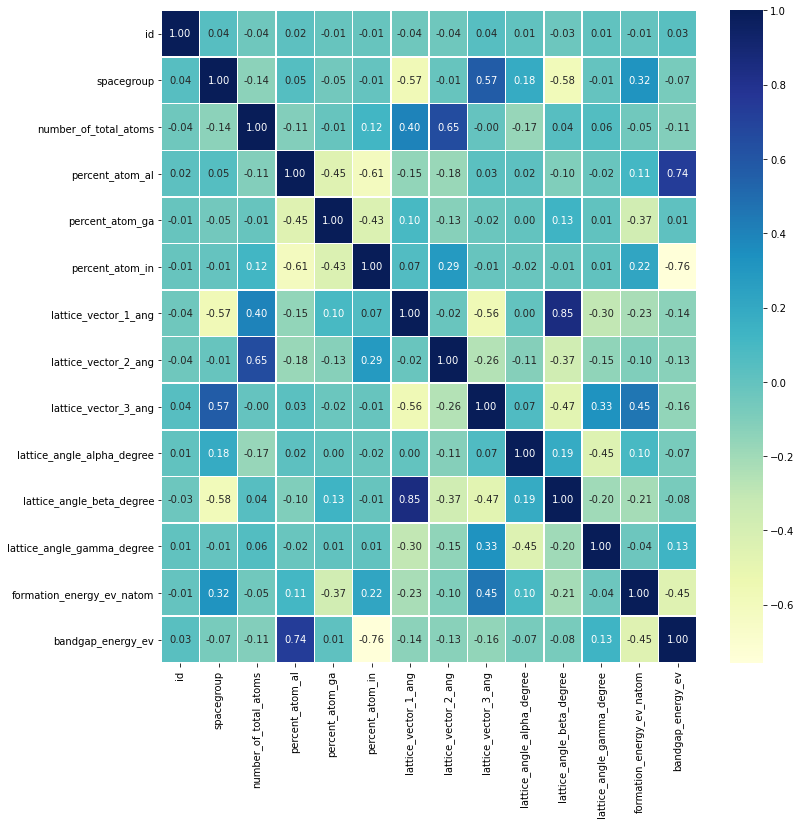

In [17]:
# Draw heatmap for the given data
corr_matrix = df_train.corr()
fig,ax = plt.subplots(figsize = (12,12))
ax = sns.heatmap(corr_matrix,annot= True, linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");


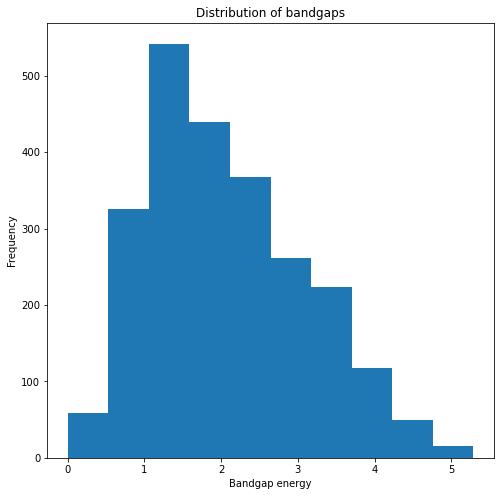

In [32]:
# Distribution of bandgaps
fig,ax = plt.subplots(figsize = (8,8))
df_train['bandgap_energy_ev'].plot.hist()
plt.title('Distribution of bandgaps')
plt.xlabel('Bandgap energy');

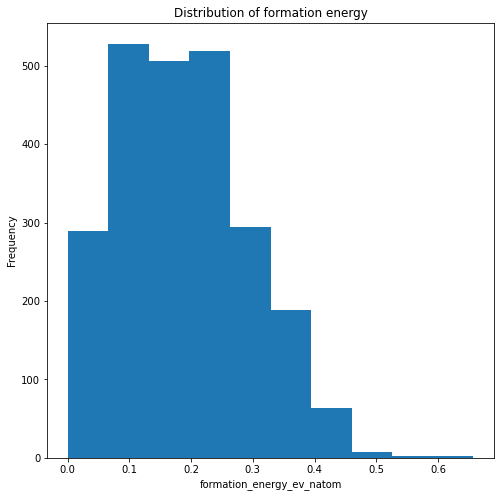

In [35]:
# Distribution of formation energy
fig,ax = plt.subplots(figsize=(8,8))
df_train['formation_energy_ev_natom'].plot.hist()
plt.xlabel('formation_energy_ev_natom');
plt.title('Distribution of formation energy');

# Modelling

In [75]:
# Splitting training data
np.random.seed(48)

x= df_train.drop(['formation_energy_ev_natom','bandgap_energy_ev'],axis =1)
y = df_train[['formation_energy_ev_natom','bandgap_energy_ev']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)



In [76]:
# Model Selection and instantiation 
model = RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.890058419472854

In [78]:
# Tunning hyperparameters using RandomizedSearchCV
model_grid_params = {"n_estimators": [40,50],
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [1530]}
rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions = model_grid_params,
                              n_iter=100,
                              cv=10,
                              verbose=True)

rs_model.fit(x_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  4.7min finished


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [1530],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': [40, 50]},
                   verbose=True)

In [79]:
# Getting the best params combination
rs_model.best_params_

{'n_estimators': 50,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_samples': 1530,
 'max_features': 'auto',
 'max_depth': 10}

In [94]:
# Tunned model score
rs_model.score(x_test,y_test)

0.8928669880862224

In [95]:
# Buliding a function for calculating root mean log error from mean_squared_log_error
def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))


In [90]:
# Make predications
y_preds = rs_model.predict(x_test)

In [96]:
# Root mean log error
rmsle(y_test, y_preds)

0.07553593763625256

# Importing test datasets for making the predictions on it

In [101]:
# importing test.csv file
df_test = pd.read_csv('./Desktop/sklearn/materials/test.csv')
df_test.head()

,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree
0,1,33,80.0,0.1875,0.4688,0.3438,10.5381,9.0141,9.6361,89.9997,90.0003,90.0006
1,2,33,80.0,0.7500,0.2500,0.0000,9.8938,8.5014,9.1298,90.0038,90.0023,90.0015
2,3,167,30.0,0.6667,0.1667,0.1667,4.9811,4.9808,13.4799,89.9900,90.0109,120.0014
3,4,12,80.0,0.5625,0.4375,0.0000,24.3370,6.0091,5.7620,89.9995,103.8581,90.0002
4,5,12,80.0,0.1875,0.5000,0.3125,24.6443,6.2906,6.1589,90.0000,104.5929,90.0001


In [103]:
len(df_test)

600

In [106]:
# predictions
test_preds = rs_model.predict(df_test)

In [110]:
test_preds

array([[0.18920615, 1.60817917],
       [0.08762408, 3.64639839],
       [0.14671472, 3.5035955 ],
       ...,
       [0.17540541, 0.82172031],
       [0.2518869 , 2.32255792],
       [0.21663304, 2.20220436]])

In [114]:
# Create dataframe of the predictions 
df_preds = pd.DataFrame()

df_preds = df_test
df_preds["formation_energy_ev_natom"] = test_preds[:,:1]
df_preds["bandgap_energy_ev"] = test_preds[:,1:2]


In [113]:
# Save it 
df_preds.to_csv("./Desktop/sklearn/materials/predictions.csv",
                index=False)